# Can you hear the size of a reservoir?

**MOD510 - Project 2 G05**   
- Jing Hou
- Parthasarathi Jena
- Hodjdat Moradi  

Date: Oct.08.2023

### Abstract :


In [359]:
# load libraries
import sys
import numpy as np
import math
import matplotlib.pyplot as plt

#%matplotlib

### Introduction :

#### Theory: 
The mass conservation equation for a reservoir (or any system which produces, transports and accumulates mass) can be written as  

$\begin{equation}
    \frac {\partial q(x,t)} {\partial t}A(x) = -\frac{\partial (J(x,t)A(x))}{\partial x} + \dot{\sigma}(x,t)A(x)
\end{equation} \tag{1}$

where,
- $A$ = the cross-sectional area at position x,
- $q$ = the mass concentration of fluid 
- $J$ = the amount of mass flowing into the volume per unit time per unit area (the mass flux)
- $\dot{\sigma}$ = a source term that describes the amount of mass of fluid *generated* per unit volume per unit time.

The reservoir is assumed to be a cylinder with radius $r_e$ and a height of $h$. A well for extraction of fluids from the reservoir is placed in the middle of the cylinder and has a radius of $r_w$. The reservoir is constituted of porous material which contains the fluids we are interested in extracting in the substrate gap. The well is a source or sink(mass is being *produced* in case of extraction or being *lost* during injection) Since our reservoir is cylindrical in shape , we shall go about manipulating the each variable in equation (1) so we can use radial coordinate system instead of Cartesian coordinates to ease computation. 

By assuming that the flow is radially symmetric, we can make the following transformations:
$\begin{equation} 
x \rightarrow r 
\end{equation} \tag{2}$
$\begin{equation}  
A(x) \rightarrow A(r)= 2\pi rh\end{equation} \tag{3}$

Since no mass is being generated in the reservoir we can set the mass generation term $\dot \sigma =0$ everywhere other than at the interface of well and reservoir, $r=r_w$. 

Mass flux therefore can be written as

$\begin{equation}
    J(x,t)=\text{mass flux}=\frac{\text{mass}}{\text{area}\cdot \text{time}}\end{equation}\tag{4}$

$\begin{equation}
        J(r,t)=\text{mass flux} = \frac{\text{mass}}{\text{volume}}\cdot\frac{\text{length}}{\text{time}} 
        J(r,t)=\text{density}\cdot\text{velocity} = \rho \cdot u(r,t)
\end{equation}\tag{5}$

Mass concentration of fluid, $q$ can written as $\phi \rho$, where $\phi$ is the porosity of the medium. It should be noted that both the density, $\rho$, and the porosity, $\phi$, can vary with pressure (and thus time, as pressure changes with time).

$\begin{equation}
    q = \phi \rho
\end{equation} \tag{6}$

Replacing $A$, $q$ and $J$ in equation (1) we get

$\begin{align}
    \begin{split}
    2\pi rh \frac{\partial (\phi \rho)}{\partial t} &=   - \frac{\partial}{\partial r}(2\pi rh \rho u_r)\\
    \frac{\partial (\phi \rho)}{\partial t} &= -\frac{1}{r} \frac{\partial}{\partial r}(r \rho u_r)
    \end{split}
\end{align} \tag{7}$


For radically symmetric flow the fluid speed parameter can be written in terms of pressure difference in the following way [3]


$\begin{equation}
    u_r =  - \frac{k}{\mu} \frac{\partial p}{\partial r}
\end{equation} \tag{8}$

where, $k$ is the absolute permeability of the rock medium, $\mu$ is the fluid viscosity, and $p$ is the fluid pressure. Assuming the fluid has a low compressibility and applying some domain knowledge *magic* equation (7) can be written as 
$\begin{equation}
    \frac{\partial p}{\partial t} =\eta \frac{1}{r} \frac{\partial}{\partial r}(r\frac{\partial p}{\partial r})
\end{equation} \tag{9}$

where, $\eta$ is the *hydraulic diffusivity*, given by 
$\begin{equation}
    \eta = \frac{k}{\mu \phi c_t}
\end{equation} \tag{10}$
$c_t=c_f+c_r$ is the total compressibility factor of the rock medium and the fluid trapped in it. $c_f$ is the fluid compressibility factor and $c_r$ the rock compressibility factor. 

We perform another transformation from radial coordinates $r$ to linear coordinates system $y$ by taking 
$\begin{align}
    y &= ln\frac{r}{r_w}\\
    \implies r &= r_w e^y\\
    \frac{\partial}{\partial r} &= \frac{\partial y}{\partial r} \frac{\partial}{\partial y} \\&= \frac{1}{r}\frac{\partial}{\partial y}\\ &= \frac{1}{r_w e^y}\frac{\partial}{\partial y}
\end{align} \tag{11}$

Thus, in the new coordinate system equation (9) transforms to 

$\begin{equation}
    \frac{\partial p}{\partial t} =\eta \frac{e^{-2y}}{r^2_w} \frac{\partial^2 p}{\partial y^2}
\end{equation} \tag{12}$
This will be the governing *diffusivity equation* for this assignment.

#### Boundary conditions:

There are two boundaries of the system 
- the boundary at the reservoir exterior wall $r = r_e$. At this boundary the pressure is constant.
$\begin{equation}
        p\rvert_{r= r_e} = p_{init}
\end{equation}\tag{13}$

    where $p_{init}$ is the initial pressure of the well
    
- the boundary at the well exterior wall $r = r_w$. At this boundary production fluid is being taken out. Assuming the well is producing a constant volume of fluid per unit time, from Darcys equation [3]

$\begin{equation}
        \begin{split}
            Q\rvert_{r_w} = -A\cdot u\rvert_{r_w} &= -2\pi rh\cdot-\frac{k}{\mu}\frac{\partial p}{\partial r}\bigg\rvert_{r_w}\\
            \implies \frac{\partial p}{\partial r} &=\frac{Q \mu}{2\pi rhk} \bigg\rvert_{r_w}\\
            \implies \frac{1}{r} \frac{\partial p}{\partial y} &=\frac{Q \mu}{2\pi rhk} \bigg\rvert_{r_w}\\
            \implies  \frac{\partial p}{\partial y} &=\frac{Q \mu}{2\pi hk} \bigg\rvert_{r_w}\\
            \implies  \frac{\partial p}{\partial y} &=\alpha \rvert_{r_w},\quad \alpha=\frac{Q \mu}{2\pi hk}
        \end{split}
    \end{equation}\tag{14}$

## Exercise 1: Steady-state solution

**Part 1**. Show that the analytical solution to equations (15)(16)(17)

$\begin{align}
\frac{d^2p}{dy^2}(y) &= 0,\quad\text{for all } y\in(y_w,y_e),\tag{15}
\end{align}$

$\begin{align}
\frac{dp}{dy}(y=y_w) &= \alpha,\tag{16}
\end{align}$

$\begin{align}
p(y=y_e) &= p_{\text{init}},\tag{17}
\end{align}$

is $$ p(y) = p_{init} + \alpha (y-y_e) \tag{18} $$


To prove this equation by integrating equation (15)(16) $$\frac{dp^2}{dy^2}(y = y_w) = 0,\quad\text{for all } y\in(y_w,y_e) $$ 
$$ \frac{dp}{dy}(y = y_w) = \alpha $$
Then we get $$\Rightarrow p(y) =  \alpha \cdot y + C \tag{19}$$

since the condition is $$ p(y = y_e) = p_{init} $$

It can be rewritten as $$ p(y = y_e) = p_{init} = \alpha \cdot y_e + C \tag{20}$$
Therefore, it shows
$$ C = p_{init} - \alpha \cdot y_e $$

By inserting $C$ back to equation (19), it shows that $$ \Rightarrow  p(y) = p_{init} + \alpha (y-y_e) $$

**Part 2**.To enforce a fixed pressure $p_e = p(y_e) = p_{init}$ at the edge of the reservoir, the "lazy" option for the exterior reservoir boundary is to simply set $$p_N = p_e$$ Figure 5 illustrates the unknown pressure values for the case $N = 4$. 
- Let $N = 4$.  When using the "lazy" implementation of the boundary condition at $y = y_e$, derive the following matrix equation, starting from the general finite difference equations for any $N$.

$$\begin{pmatrix}
-1 & 1 & 0 & 0 \\
1 & -2 & 1 & 0 \\
0 & 1 & -2 & 1 \\
0 & 0 & 1 & -2 
\end{pmatrix}
\begin{pmatrix}p_0 \\ p_1 \\ p_2 \\ p_3 \end{pmatrix} =
\begin{pmatrix}
\alpha \Delta y \\ 0 \\ 0 \\ -p_e \end{pmatrix}\tag{21}$$


Based on Taylor's Formula $$f''(x) = \frac{f(x+h) + f(x-h) - 2f(x)}{h^2} \tag{22}$$ In this case, 
$$\frac{d^2p}{dy^2} =\frac{p(y_{i+1}) + p(y_{i-1}) - 2p(y_i)}{{\Delta y}^2}\tag{23}$$ 
Given the condition is fixed pressure, $\frac{ dp^2}{dy^2} = 0$ 
$$\frac{d^2p}{dy^2} = \frac{p(y_{i+1}) + p(y_{i-1}) - 2p(y_i)}{{\Delta y}^2} = 0 \tag{24}$$
since $\frac{dp}{dy} = \alpha$
$$ \frac{dp}{dy} = \frac{p_0 - p_{-1}}{\Delta y} = \alpha $$ 
Therefore for lazy mode, ghost position: $p_{-1} = p_0 - \alpha \Delta  y $ and , boundary position as $N = 4$, $p_4 = p_e$

$$ i= 0\Rightarrow  -p_0 + p_1 =  \alpha \Delta y $$
$$ i= 1\Rightarrow   p_0 - 2p_1 + p_2 = 0 $$
$$ i= 2\Rightarrow   p_1 - 2p_2 + p_3 = 0 $$
$$ i= 3\Rightarrow   p_2 - 2p_3 = - p_e $$

Then it can be written as
$$\begin{pmatrix}
-1 & 1 & 0 & 0 \\
1 & -2 & 1 & 0 \\
0 & 1 & -2 & 1 \\
0 & 0 & 1 & -2 
\end{pmatrix}
\begin{pmatrix}p_0 \\ p_1 \\ p_2 \\ p_3 \end{pmatrix} =
\begin{pmatrix}
\alpha \Delta y \\ 0 \\ 0 \\ -p_e \end{pmatrix}$$

**Part 3**. What is the truncation error for the finite difference approximation at interior grid points? (be as specific as you can!)



The truncation error for the finite difference approximation at interior grid points mentioned in the book [4] (section 3.3, 3.4)

Based on Taylor's formula, in this scenario, it can be written as 
$$ p''= \frac{p_{i+1} + p_{i-1}  - 2p_i}{{\Delta y}^2} =  \frac{2}{4!}p^{(4)}(\eta_i)\Delta y^2 \tag{25}$$
As we calculate the derivative of analytical solution,
$$p(y) = p_{init} + \alpha (y-y_e) $$
$$p'(y) =\alpha$$
$$p''(y) = 0$$
$$p^{3}(y) = 0, p^{4}(y) = 0 \ldots$$

It clearly shows that analytical solution is at polynomial order of 1. Therefore, the truncation error will be zero at interior grid points

**Part 4**. We want to investigate, theoretically, the error of the "lazy" approximation to the pressure boundary condition. Use Taylor’s formula to  
<br>
- Find how the order of the numerical error scales when using the "lazy" approximation.

- Use Taylor’s formula to show that we can derive the following, "not-so-lazy" version of the boundary condition: $p_N = 2p_e − p_{N−1}$ (28)

- Let $N = 4$. What is the matrix equation we now need to solve when using equation (28) for the outer boundary condition?

- when using the 'lazy' approximation, boundary condition is $p_N = p_e = p_{approximation}$, therefore, the error is basically $p_{true} - p_{approximation}$ $$ p(y_e + \Delta{y}/2) - p(y_e) =  p'(\eta)\frac{\Delta{y}}{2}  \tag{26} $$
Therefore the order of numerical error is 1, it will scale as $\Delta y$

- Use Taylor's formula, at boundary position(not-so-lazy mode): 

$\begin{align}
    p_N =p(y_e + \Delta y/2)
    =p_(y_e)+ p'_(y_e) \frac{\Delta{y}}{2} + {\cal O}( \Delta y^2) \\
    =p_e+ \frac{p_N-p_{N-1}}{2}+{\cal O}(\Delta y^2),\\
    p_N =2p_e-p_{N-1}+{\cal O}(\Delta y^2)
\end{align}  \tag{27}$


- For 'not-so-lazy' version of boundary condition is: $$p_N = 2p_e - p_{N-1}  \tag{28}$$ As $N = 4$, we replace $$p_4 = 2p_e - p_{3} $$
Therefore, the matrix equation can be modified and re-written as

$$ i= 0\Rightarrow  -p_0 + p_1 =  \alpha \Delta y $$
$$ i= 1\Rightarrow   p_0 - 2p_1 + p_2 = 0 $$
$$ i= 2\Rightarrow   p_1 - 2p_2 + p_3 = 0 $$
$$ i= 3\Rightarrow   p_2 - 3p_3 = - 2p_e $$

Then it can be written as
$$\begin{pmatrix}
-1 & 1 & 0 & 0 \\
1 & -2 & 1 & 0 \\
0 & 1 & -2 & 1 \\
0 & 0 & 1 & -3 
\end{pmatrix}
\begin{pmatrix}p_0 \\ p_1 \\ p_2 \\ p_3 \end{pmatrix} =
\begin{pmatrix}
\alpha \Delta y \\ 0 \\ 0 \\ -2p_e 
\end{pmatrix}\tag{29}$$

**Part 5**
- For both implementations of the boundary condition at $y = y_e$, solve the matrix equation multiple times by varying the number of grid points.

- Based on your simulation results, make a scatter plot of the numerical error versus grid size. Ideally, you should evaluate the different solutions at the same physical point in space. Use the analytical formula given by equation (18) as the "true solution".

- Does the error scale as you expect? Discuss.

In [398]:
class PressureSolverSimple():
    """Simple version of class for pressure solver of time-invariant"""
    
    def __init__(self,N, pe = 4100, re = 1000, rw = 0.318, alpha = 1):
        self.N = N       # number of grid points
        self.pe = pe     # initial pressure psi
        self.re = re     # outer boundary  ft
        self.rw = rw     # well radius    ft
        self.alpha = alpha
    
        self.ye = np.log (self.re / self.rw)
        self.yw = np.log(rw / rw)               # y coordinate of well
        self.dy = self.ye /self.N               # each grid cell size
        self.y = np.arange(self.dy/2,self.ye,self.dy)   # for numerical y
        self.ya = np.linspace(0,self.ye,self.N)         # for analytical y
        
    def analytical(self):
        """analytic solution for the steady-state problem,
        given alpha and initial pressure pi = pe
        p(y) = pi + alpha(y - ye)
        """
        y=self.ya
        return  self.pe + self.alpha * (y - self.ye)
    
    def set_up_matrix_and_bc(self):
        """set up left-hand-side matrix and boundary condition """
        a=np.array(np.ones(self.N-1))
        b=np.array(np.repeat(-2,self.N))
        c=np.array(np.ones(self.N-1))

        b[0]=-1
        if self.lazy == False:
            b[-1]=-3
        self.A=np.diag(a,k=-1)+np.diag(b,k=0)+np.diag(c,k=1)
    
    def set_up_rhs_and_bc(self):
        """set up right-hand-side matrix and boundary condition"""
        self.rhs= np.zeros(self.N)
        self.rhs[0] = self.alpha* self.dy
        if self.lazy:
            self.rhs[-1] = -self.pe
        else: # not lazy condition
            self.rhs[-1] = -self.pe * 2
    
    def solve(self):
        self.set_up_matrix_and_bc()
        self.set_up_rhs_and_bc()
        self.P = np.linalg.solve(self.A,self.rhs)
    
    def set_lazy_condition(self, lazy):
        """Option to set lazy (True) or not lazy (False) condition """
        self.lazy=lazy
        
    def plot(self):
        self.set_lazy_condition(False)
        self.solve()
        plt.plot(self.y,self.P,'*',color = 'r',label='Not Lazy')
        self.set_lazy_condition(True)
        self.solve()
        plt.plot(self.y,self.P,'*',color = 'g',label='Lazy')
        #ya =  np.linspace(0,self.ye,100)
        Pa = self.analytical()
        plt.plot(self.ya,Pa,color = 'b',label='analytical')
        plt.title(f'Figure 1: Plot of Pressure versus number of grid size, Grid number: N = {self.N}',fontsize =10, y=-0.2)
        plt.xlabel('y coordinate')
        plt.ylabel('Pressure')
        plt.legend()
        plt.grid()

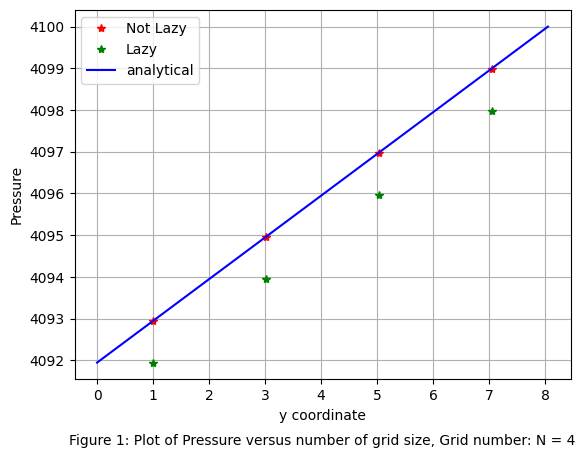

In [400]:
p4 = PressureSolverSimple(N = 4)
p4.plot()

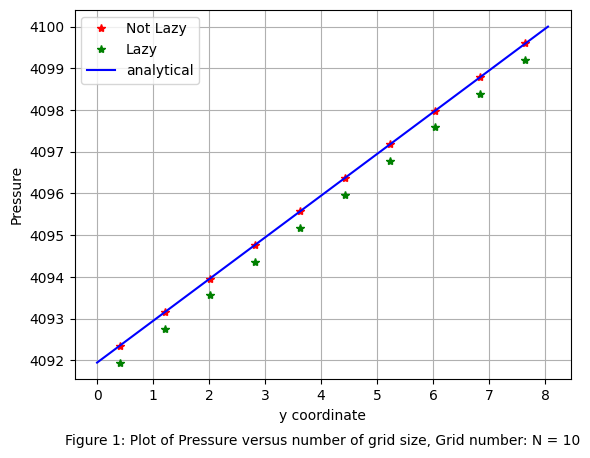

In [401]:
p10 = PressureSolverSimple(N = 10)
p10.plot()

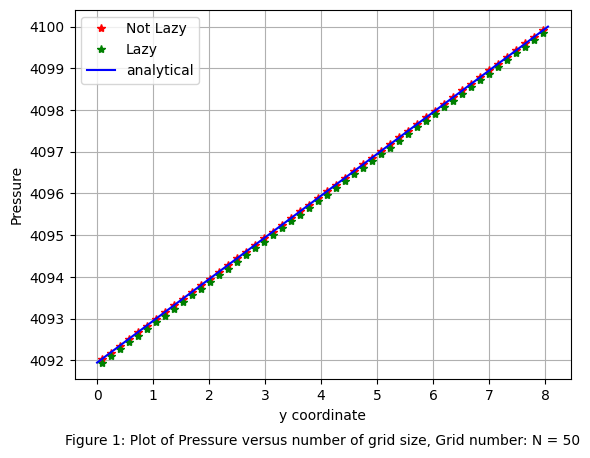

In [402]:
p50 = PressureSolverSimple(N = 50)
p50.plot()

In [407]:
dys = []             # grid size per grid count (N) realizations
error_lazy =[]     
error_not_lazy=[]

N = np.logspace(np.log(4), 3, dtype=int)

for i in N:
    A=PressureSolverSimple(N=i)
    dys.append(A.dy)
    
    # Lazy condition
    A.set_lazy_condition(True)
    A.solve()
    currentError=np.abs(A.P[-1]-A.analytical()[-1])
    error_lazy.append(currentError)
    
    # Not lazy condition
    A.set_lazy_condition(False)
    A.solve()

    currentError=np.abs(A.P[-1]-A.analytical()[-1])
    error_not_lazy.append(currentError)


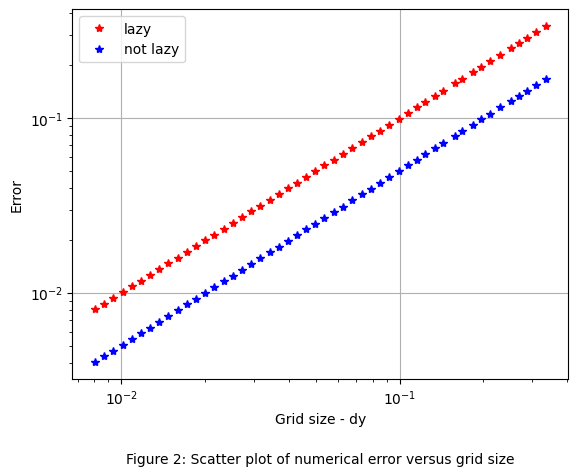

In [408]:
plt.plot(dys,error_lazy,'*',color='r',label='lazy')
plt.plot(dys,error_not_lazy,'*',color='b',label='not lazy')
plt.legend()
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Grid size - dy')
plt.ylabel('Error')
plt.title('Figure 2: Scatter plot of numerical error versus grid size',
        fontsize =10, y=-0.25)
plt.show()

The error results align with our expectations. The 'not-so-lazy' approach gives no error, whereas the lazy approach produces large error, particularly when the grid node count is low. As we increase the number of nodes, the lazy approximation is compelled to approach the real model. The observations are evident in the graphs. The scatter plot of numerical error against grid size shows that the error value of lazy approach scales approximately the same amount as the grid size dy which is first order, is matched to our calculations based on Taylor's formula.

## Exercise 2: Time-dependent solution

**Part 1**
- Show that for the special case N = 4, the matrix equation we need to solve each time step is:

$$\underbrace{
\begin{pmatrix}
1 + \xi_0 & -\xi_0 & 0 & 0 \\
-\xi_1 & 1 + 2\xi_1 & -\xi_1 & 0 \\
0 & -\xi_2 & 1 + 2\xi_2 & -\xi_2 \\
0 & 0 & -\xi_3 & 1 + 3\xi_3 
\end{pmatrix}}_{A} \underbrace{\begin{pmatrix}
p_0^{n+1} \\
p_1^{n+1} \\
p_2^{n+1} \\
p_3^{n+1} 
\end{pmatrix}}_{p^{n+1}} = \underbrace{\begin{pmatrix}
p_0^{n} \\
p_1^{n} \\
p_2^{n} \\
p_3^{n} \\
\end{pmatrix}}_{p^n} + \underbrace{\begin{pmatrix}
-\beta \xi_0 \\
0 \\
0 \\
2p_e \xi_3
\end{pmatrix}}_{d} \tag{30}$$

where we have defined $$\xi_i \equiv \frac{\eta e^{-2y_i} \Delta t }{r_w^2 \Delta y^2} \tag{31}$$ and


$$\beta \equiv \frac{Q\mu \Delta y}{2 \pi k h} \tag{32}$$

Following the *implicit time-discretization* scheme
$$\begin{equation}
\frac{p_i^{n+1} - p_i^n}{\Delta t} = \eta \cdot \frac{e^{-2y_i}}{r_w^2} \cdot \frac{p_{i+1}^{n+1} + p_{i-1}^{n+1} - 2p_i^{n+1}}{\Delta y^2} 
\end{equation} \tag{33}$$

as $$\xi_i \equiv \frac{\eta e^{-2y_i} \Delta t }{r_w^2 \Delta y^2}$$

$$\begin{equation}
p_i^{n+1} - p_i^n = \xi_i \cdot \big(p_{i+1}^{n+1} + p_{i-1}^{n+1} - 2p_i^{n+1} \big)
\end{equation} \tag{34}$$

Therefore, as $N =4$

$$ i = 0 \Rightarrow p_0^{n+1} - p_0^n = \xi_0 \cdot \big(p_{1}^{n+1} + p_{-1}^{n+1} - 2p_0^{n+1} \big)$$ 
$$ i = 1 \Rightarrow p_1^{n+1} - p_1^n = \xi_1 \cdot \big(p_{2}^{n+1} + p_{0}^{n+1} - 2p_1^{n+1} \big)$$ 
$$ i = 2 \Rightarrow p_2^{n+1} - p_2^n = \xi_2 \cdot \big(p_{3}^{n+1} + p_{1}^{n+1} - 2p_2^{n+1} \big)$$ 
$$ i = 3 \Rightarrow p_3^{n+1} - p_3^n = \xi_3 \cdot \big(p_{4}^{n+1} + p_{2}^{n+1} - 2p_3^{n+1} \big) \tag{35}$$ 

At ghost boundary position:
$$p_{-1}^{n+1} = p_0^{n+1} - \alpha \Delta y \tag{36}$$
'Not-so-lazy' ghost boundary position:
$$p_{4}^{n+1} = 2p_e - p_3^{n+1}  \tag{37}$$

By inserting ghost boundary positions back to the equations(32), equations can be rewritten as 
$$ i = 0 \Rightarrow (1 + \xi_0)p_0^{n+1} - \xi_0 p_1^{n+1} = p_0^n - \xi_0 \alpha \Delta y $$
$$ i = 1 \Rightarrow -\xi_1 p_0^{n+1} + (1 + 2\xi_1)p_1^{n+1} - \xi_1 p_2^{n+1} =  p_1^n  $$
$$ i = 2 \Rightarrow -\xi_2 p_1^{n+1} + (1 + 2\xi_2)p_2^{n+1} - \xi_2 p_3^{n+1} =  p_2^n  $$
$$ i = 3 \Rightarrow -\xi_3 p_2^{n+1} + (1 + 3\xi_3)p_3^{n+1} = p_3^n + 2\xi_3 p_e  $$

and replacing $\alpha\Delta{y}$ by $\beta$ as
$\begin{equation}
\beta \equiv \alpha\Delta{y} \equiv  \frac{Q\mu\Delta{y}}{2\pi hk} \tag{32}
\end{equation}$

Now, the solution can be rewritten in matrix equation format: 

$$\underbrace{
\begin{pmatrix}
1 + \xi_0 & -\xi_0 & 0 & 0 \\
-\xi_1 & 1 + 2\xi_1 & -\xi_1 & 0 \\
0 & -\xi_2 & 1 + 2\xi_2 & -\xi_2 \\
0 & 0 & -\xi_3 & 1 + 3\xi_3 
\end{pmatrix}}_{A} \underbrace{\begin{pmatrix}
p_0^{n+1} \\
p_1^{n+1} \\
p_2^{n+1} \\
p_3^{n+1} 
\end{pmatrix}}_{p^{n+1}} = \underbrace{\begin{pmatrix}
p_0^{n} \\
p_1^{n} \\
p_2^{n} \\
p_3^{n} \\
\end{pmatrix}}_{p^n} + \underbrace{\begin{pmatrix}
-\beta \xi_0 \\
0 \\
0 \\
2p_e \xi_3
\end{pmatrix}}_{d} \tag{30}$$

**Part 2**

Again let N = 4. Assume default model input parameters (see Appendix B), and that $\Delta t = 0.01$ day

- Show that the matrix is (in SI units):

$$ \begin{pmatrix} 5.28702460e + 03 & −5.28602460e + 03 & 0.00000000e + 00 & 0.00000000e + 00 \\
−9.42633218e + 01 & 1.89526644e + 02 & −9.42633218e + 01 & 0.00000000e + 00 \\
0.00000000e + 00 & −1.68095582e + 00 &  4.36191165e + 00  & −1.68095582e + 00 \\
0.00000000e + 00 & 0.00000000e + 00 & −2.99757363e − 02 & 1.08992721e + 00 \\ \end{pmatrix}$$


In [403]:
class PressureSolver:
    """
    A finite difference solver to solve pressure distribution in
    a reservoir, logarithmic grid has been used, y = ln(r/rw)
    The solver uses SI units internally, while "practical field units"
    are required as input.
    Input arguments:
    name symbol unit
    --------------------------------------------------------------
    Number of grid points N dimensionless
    Constant time step dt days
    Well radius rw ft
    Outer reservoir boundary re ft
    Height of reservoir h ft
    Absolute permeability k mD
    Porosity phi dimensionless
    Fluid viscosity mu mPas (cP)
    Total (rock+fluid) compressibility ct 1 / psi
    Constant flow rate at well Q bbl / day
    Initial reservoir pressure pi psi
    -------------------------------------------------------------
    """
    
    def __init__(self,N,dt,rw=0.318,re=1000.0,h=11.0,phi=0.25,mu=1.0,ct=7.8e-6,Q=1000.0,k=500,pi=4100.0):
    
        # Unit conversion factors (input units --> SI)
        self.ft_to_m_ = 0.3048
        self.psi_to_pa_ = 6894.75729
        self.day_to_sec_ = 24.*60.*60.
        self.bbl_to_m3_ = 0.1589873

        # Grid
        self.N_ = N
        self.rw_ = rw*self.ft_to_m_
        self.re_ = re*self.ft_to_m_
        self.h_ = h*self.ft_to_m_
    
        # Rock and fluid properties
        self.k_ = k*1e-15 / 1.01325 # from Darcy to m^2
        self.phi_ = phi
        self.mu_ = mu*1e-3 # from cP to Pas
        self.ct_ = ct / self.psi_to_pa_
    
        # Initial and boundary conditions
        self.Q_ = Q*self.bbl_to_m3_ / self.day_to_sec_
        self.pi_ = pi*self.psi_to_pa_
    
        # Time control for simulation
        self.dt_ = dt*self.day_to_sec_
        
        
        # My own code
        
        self.eta_ = self.k_/(self.mu_*self.phi_*self.ct_)

    

    # TO DO: Add more stuff below here....
    # (grid coordinates, dy, eta, etc.)

**Part 3**
- Implement a simulator that solves the time-dependent problem for any choice of input parameters.

## Exercise 3: Accuracy and performance of timedependent solution

**Part 1**
- For several values of N, compare your numerical solver implementation to the line-source solution given by equation (27). To do the comparison, you need to plot your solution in terms of the *physical coordinates*, i.e.,
$r(y) = r_we^y$.

**Part 2** Next, we want to take advantage of the symmetry of the problem. At run-time, the simulator should be able to choose between three different matrix
solvers:
1. Dense, using numpy.linalg.solve.  
2. Sparse using, scipy.sparse.linalg.spsolve.  
3. Sparse, using the Thomas algorithm). An implementation of the Thomas algorithm can be found in appendix D.  
4. Use the %timeit option in Jupyter to compare the speed of each solver.  
How large must N be in order to see a difference?  

## Exercise 4: Match model to well test data

**Part 1** So far, we have calculated the pressure distribution *inside the reservoir*. The actual observable well pressure is missing from our calculations, but we can estimate it by discretizing equation (13).
- Use a first-order finite difference approximation to find a formula for the well pressure in terms of the well block pressure, $p_0$.
- In your final delivery, make sure that your numerical simulator includes a function to calculate the well pressure as a function of the well-block pressure.
Hint: Use Taylor’s formula with step-size $\Delta y/2$.

**Part 2**  Well test data are available in the text file well_bhp.dat (located in the data folder).
- Read the well test data into Python, and make a scatter plot of well pressures versus time.

**Part 3** Towards the end of the test, we see that the well pressure stabilizes towards a constant value. This indicates that the pressure wave has reached the edge of the reservoir. For this part you may assume default model input (Appendix B) for all parameters except the following three: $k, p_i,$ and $r_e$

- Fit your numerical model to the well test data by changing the values of $k, p_i,$ and $r_e$
- Make a plot in which you compare 1) the well test data, 2) your numerical well pressure solution, and 3) the corresponding line-source solution.
- Use a logarithmic scale on the x-axis.

Hints: You may try to match the well test curve manually, but it might be easier to use automated curve-fitting.

**Part 4**
- Based on the value you found for $r_e$, what is the total volume of water in the reservoir?

------------------------------------
### **Reflections**:
- Jing:


- Partha:


- Hodjdat: 

### **Conclusion**: 




### **References**: 

[1]  Laurence Patrick Dake. Fundamentals of Reservoir Engineering. Elsevier, 1983.  
[2]  Henry Darcy. Les Fontaines Publiques De La Ville De Dijon: Exposition Et Application... Victor Dalmont, 1856.  
[3] M. King Hubbert. Darcy’s law and the field equations of the flow of underground fluids. Transactions of the AIME, 207(01):222–239, 1956.  
[4] Aksel Hiorth. *Computational Engineering and Modeling*. https://github.com/ahiorth/CompEngineering, 2023  
[5]   
[6] Robert Edwin Wengert. A simple automatic derivative evaluation program. Communications of the ACM, 7(8):463–464, 1964.